In [1]:
import numpy as np
from scipy import integrate
import torch

import matplotlib
import matplotlib.pyplot as plt

from probability_distribution import mu_gaussians, mu_display2D, mu_normalize
from fourier_functions import Fourier_Functions, Fourier_Functions_Visualize2D
import pickle 

2.383759522614545


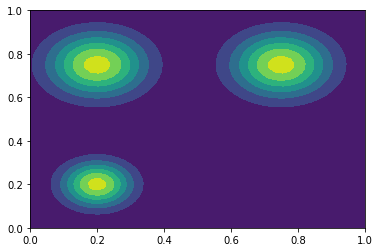

In [2]:
U_shape = (1,1)
p1 = mu_gaussians([(0.2, 0.01), (0.75, 0.02), (np.array([0.2, 0.75]), 0.02)], U_shape)
p1 = mu_normalize(p1, U_shape)
print(p1(np.array([0.2,0.3])))
mu_display2D(p1, U_shape)


In [3]:
# U_shape = (1,1)
# p1 = mu_gaussians([(np.array([0.2, 0.75]), 0.02)], U_shape)
# p1 = mu_normalize(p1, U_shape)
# print(p1(np.array([0.2,0.3])))
# mu_display2D(p1, U_shape)

In [4]:
mu = p1
K = 5
ff = Fourier_Functions(mu, U_shape, K, compute_mu=False, printProgress=True)

# mu_k = {}
# for k in ff:
#     mu_k[k] = ff[k]['mu_k']

# with open(f'mu_k{K}.pkl', 'wb') as handle:
#     pickle.dump(mu_k, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(f'mu_k{K}.pkl', 'rb') as handle:
    mu_k = pickle.load(handle)

for k in ff:
    print(k)
    ff[k]['mu_k'] = mu_k[k]
    print(ff[k]["lambda_k"])
    # Fourier_Functions_Visualize2D(U_shape, ff[k])


Fourier Functions (mu, U_shape= (1, 1) , K= 5 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing casadi fourier function (casadi_f_k)...
Aggregating all constants and functions into one dict...
Done.
(0, 0)
1.0
(0, 1)
0.027904830742777952
(0, 2)
0.003882976034633084
(0, 3)
0.0011746100726228368
(0, 4)
0.0004991810750785978
(1, 0)
0.027904830742777952
(1, 1)
0.010587946150702864
(1, 2)
0.002799151340996149
(1, 3)
0.0010045767244604342
(1, 4)
0.00045604309714348455
(2, 0)
0.003882976034633084
(2, 1)
0.002799151340996149
(2, 2)
0.0013986743360864193
(2, 3)
0.0006801077776559527
(2, 4)
0.00035786026367164685
(3, 0)
0.0011746100726228368
(3, 1)
0.0010045767244604342
(3, 2)
0.0006801077776559527
(3, 3)
0.0004187790721030564
(3, 4)
0.0002564516577633839
(4, 0)
0.0004991810750785978
(4, 1)
0.00045604309714348455
(4, 2)
0.00035786026367164685
(4, 3)
0.0002564516577633839
(4, 4)
0.0001773233884495392


In [5]:
from mm_agent import MMAgent1
from casadi_agent import CasadiAgent
from global_comm_agent_system import GlobalCommunicationSystem
from ergodic_agents import Agent, AgentSystem
# can only really test init rn
n = len(U_shape)
all_k = list(np.ndindex(*[K]*n))
agent1 = MMAgent1(0, np.array([0.2, 0.3]), 0.5, all_k, U_shape, ff, eps=1e-5)
# agent2 = MMAgent1(0, np.array([0.7, 0.9]), 0.2, all_k, U_shape, ff, eps=1e-5)
# agent3 = MMAgent1(0, np.array([0.4, 0.1]), 0.2, all_k, U_shape, ff, eps=1e-5)
# for k in agent1.k_bands:
#     print("mu"+str(k)+": ", ff[k]["mu_k"])
print("agent1 kbands: ", agent1.k_bands)
print("agent1 ck: ", agent1.get_c_k_log())
print("agent1 ergodicity: ", agent1.get_ergodicity_log())
print("agent1 position: ", agent1.get_position_log())
# agent2 = CasadiAgent(1, np.array([0.7, 0.4]), 0.2, all_k, U_shape, ff, eps=1e-5)
# print(agent2.get_c_k_log())
# print(agent2.get_ergodicity_log())
# print(agent2.get_position_log())
print("system")
system1 = AgentSystem([agent1], mu, U_shape, ff, K)
print("system k_bands: ", list(system1.all_k_bands))
print("system c_k: ", system1.get_c_k_log())
print("system ergodicity: ", system1.get_ergodicity_log())
# print(agent2.u_plan)

agent1 kbands:  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
agent1 ck:  [{(0, 0): array(1.), (0, 1): array(0.83125388), (0, 2): array(-0.43701602), (0, 3): array(-1.34499702), (0, 4): array(-1.14412281), (1, 0): array(1.14412281), (1, 1): array(0.95105652), (1, 2): array(-0.5), (1, 3): array(-1.53884177), (1, 4): array(-1.30901699), (2, 0): array(0.43701602), (2, 1): array(0.36327126), (2, 2): array(-0.19098301), (2, 3): array(-0.58778525), (2, 4): array(-0.5), (3, 0): array(-0.43701602), (3, 1): array(-0.36327126), (3, 2): array(0.19098301), (3, 3): array(0.58778525), (3, 4): array(0.5), (4, 0): array(-1.14412281), (4, 1): array(-0.95105652), (4, 2): array(0.5), (4, 3): array(1.53884177), (4, 4): array(1.30901699)}]
agent1 ergodicity:  [0.09093275]
agent1 position:  [[0.2 0.3]]
system
system k_bands:  [(0, 0), (0, 1), (0, 2), (0, 

In [6]:
t = 0
delta_t = 0.1
for i in range(1000):
    t = i * delta_t
    system1.evolve(t, delta_t)


oh no at time  15.5
oh no at time  19.0
oh no at time  24.200000000000003
oh no at time  32.9
oh no at time  33.1
oh no at time  42.7
oh no at time  46.300000000000004
oh no at time  54.1
oh no at time  74.7
oh no at time  93.80000000000001
oh no at time  99.10000000000001


In [7]:
print("System vs Agent 1 c_k")
print(len(system1.c_k_log))
print(system1.c_k_log[10])
# print(agent2.system_c_k)
# print(len(agent2.x_log))
k = (1,2)
# print([system1.c_k_log[i][k] - agent2.c_k_log[i][k] for i in range(5)])
# print([system1.c_k_log[-i][k] - agent2.c_k_log[-i][k] for i in range(5)])
# print(agent2.x_log)
print(system1.get_ergodicity_log()[-1])

System vs Agent 1 c_k
1001
{(0, 0): 1.0, (0, 1): -0.08808481895037112, (0, 2): -0.9738356119825579, (0, 3): 0.10894050978457519, (0, 4): 0.14760121001585588, (1, 0): 0.7603419692594182, (1, 1): 0.06178783450842948, (1, 2): -0.7745137849859953, (1, 3): -0.15770540552144313, (1, 4): 0.1769380388872572, (2, 0): -0.519170726640307, (2, 1): 0.3200134980908913, (2, 2): 0.4595618195935268, (2, 3): -0.5797970189798639, (2, 4): -0.00033163126504023865, (3, 0): -1.154746557932932, (3, 1): 0.17941981480647123, (3, 2): 1.1884967458154336, (3, 3): -0.29985828695869954, (3, 4): -0.3305312812436434, (4, 0): -0.6791772508072066, (4, 1): -0.3057801563380297, (4, 2): 0.8392430817225816, (4, 3): 0.5998802018932188, (4, 4): -0.484170791442667}
0.00011672140578828702


[([], [])]
[]


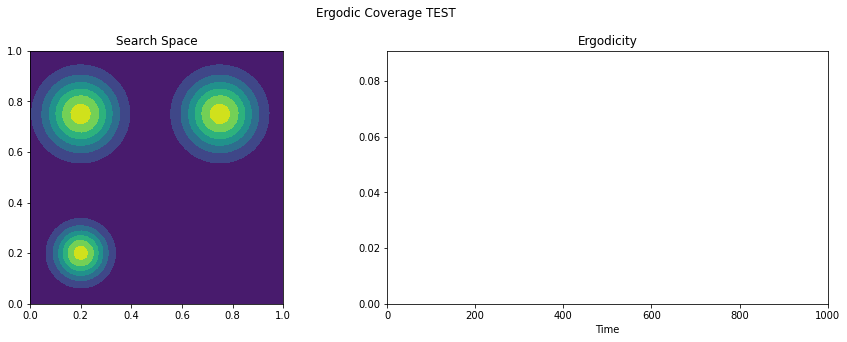

In [8]:
system1.visualize2d(filename="numagents=1_K=5", additional_title="TEST", plot_c_k=False)

In [8]:
def fourier_coefficient2distribution(ff, k_bands, c_k=None):
    def dist(x):
        res = 0
        for k in k_bands:
            if c_k is None:
                coeff_k = ff[k]['mu_k']
            else:
                coeff_k = c_k[k]
            res += coeff_k*ff[k]['f_k'](x)
        return res
    return dist

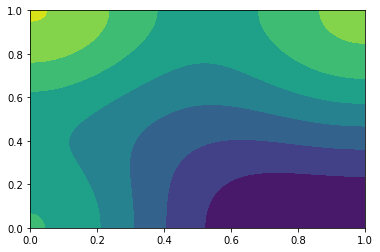

In [9]:
recon_mu = fourier_coefficient2distribution(ff, all_k)
mu_display2D(recon_mu, U_shape)

In [11]:
# i = 10
for i in [0, 20, 40, 60, 80, 100]:
    print("i: ", i)
    print(agent1.x_log[i])
    recon_c_k = fourier_coefficient2distribution(ff, all_k, agent1.c_k_log[i])
    mu_display2D(recon_c_k, U_shape)

i:  0
[0.2 0.3]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [ ]:
i = -1
print(agent1.x_log[i])
recon_c_k = fourier_coefficient2distribution(ff, all_k, agent1.c_k_log[i])
mu_display2D(recon_c_k, U_shape)

In [ ]:
def mu_time(t):
    return mu_gaussians([(np.array([0.2+0.05*t, 0.4]), 0.1/t), (np.array([0.8-0.1*t, 0.8]), 0.05), (np.array([0.8, 0.2]), 0.025)], (1,1))

for i in range(3):
    mu_display2D(mu_time(i+1), (1,1))